<a href="https://colab.research.google.com/github/hernandemonteiro/host_national_search_2015/blob/main/host_national_search_2015.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [6]:
# add packages
!pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import pandas as pd

In [7]:
data = pd.read_csv("dados.csv")

# Frequency Distributions qualitative variables



In [9]:
data.Sexo.value_counts()

0    53250
1    23590
Name: Sexo, dtype: int64

In [11]:
data.Sexo.value_counts(normalize=True)

0    0.692998
1    0.307002
Name: Sexo, dtype: float64

In [12]:
frequency = data.Sexo.value_counts()

In [18]:
percent = data.Sexo.value_counts(normalize=True) * 100

In [19]:
dist_freq_qual = pd.DataFrame({
    "frequency": frequency,
    "Percent %": percent
})


dist_freq_qual.rename(index={
    0: "Man",
    1: "Woman"
}, inplace=True)


dist_freq_qual.rename_axis("Gender", axis="columns", inplace=True)

dist_freq_qual

Gender,frequency,Percent %
Man,53250,69.299844
Woman,23590,30.700156


Or use this second way:

In [20]:
gender = {
    0: "Man",
    1: "Woman"
}


color = {
    0: "Native",
    2: "White",
    4: "Black",
    6: "Yellow",
    8: "Parda*",
    9: "No declareted"
}

In [25]:
frequency = pd.crosstab(data.Sexo, data.Cor)


frequency.rename(index=gender, inplace=True)


frequency.rename(columns=color, inplace=True)


frequency

Cor,Native,White,Black,Yellow,Parda*
Sexo,,,,,
Man,256,22194,5502,235,25063
Woman,101,9621,2889,117,10862


# Frequency distributions - quantitative variables

In [27]:
data.Renda.min()

0

In [28]:
data.Renda.max()

200000

In [30]:
classes = [0, 1576, 3152, 7880, 15760, 200000]

In [31]:
labels = ['E', 'D', 'C', 'B', 'A']

<Axes: title={'center': 'Salários da população em 2015'}, xlabel='Quantidade de SMs', ylabel='Quantidade de pessoas'>

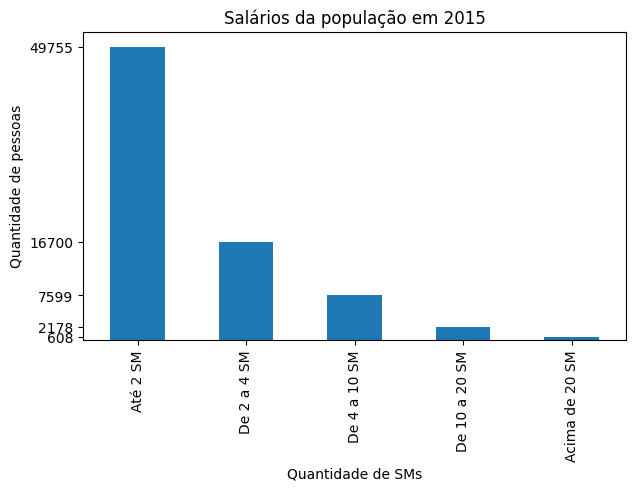

In [33]:
renda_per_pop = pd.value_counts(pd.cut(x=data.Renda, bins=classes, labels=labels, include_lowest=True))

labels_dict = {
    'E': "Até 2 SM",
    'D': "De 2 a 4 SM",
    'C': "De 4 a 10 SM",
    'B': "De 10 a 20 SM",
    'A': "Acima de 20 SM"
}

renda_per_pop.rename(index=labels_dict, inplace=True)


plot_pop_sm = renda_per_pop.plot(kind="bar", title="Salários da população em 2015",
                                      xlabel="Quantidade de SMs", ylabel="Quantidade de pessoas",
                                      figsize=(7, 4), yticks=renda_per_pop)


plot_pop_sm